In [2]:
#!/usr/bin/python
import sys
import pickle
import numpy as np
from time import time
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline

'''
Questions
1. need more data other than final_project_dataset.pkl?
2. need to create a new data_dict with only the features I need? How to choose?
3. split the feature data into training and testing data? use provided code to split features and labels, and the CV to
split training and testing.
4. need to visualize data? No

'''

'\nQuestions\n1. need more data other than final_project_dataset.pkl?\n2. need to create a new data_dict with only the features I need? How to choose?\n3. split the feature data into training and testing data? use provided code to split features and labels, and the CV to\nsplit training and testing.\n4. need to visualize data? No\n\n'

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary','to_messages','deferral_payments','total_payments','exercised_stock_options',
                'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 
                 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi',
                 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 
                 'from_poi_to_this_person'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


In [4]:
### Data exploration
# number of data points
# propotion of poi
pois = 0.0
for i in data_dict:
    if data_dict[i]['poi'] == True:
        pois += 1
print 'There are {} POI and {} person in total. The propotion of POI is {}'.format(int(pois), len(data_dict),round(pois / len(data_dict),2))

There are 18 POI and 146 person in total. The propotion of POI is 0.12


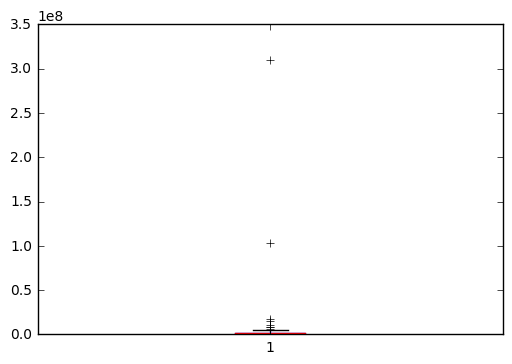

LAY KENNETH L 103559793.0
TOTAL 309886585.0


In [5]:
### Task 2: Remove outliers
total_payments = []

for name in data_dict:
    if data_dict[name]['total_payments'] != 'NaN':
        total_payments.append(data_dict[name]['total_payments'])
payments = np.array(total_payments)
average = np.mean(payments)
std =  np.std(payments)

plt.boxplot(payments)
plt.show()

# Two points are Kenny and TOTAL, sure the "TOTAL" should be an outlier.
for name in data_dict:
    if float(data_dict[name]['total_payments']) >= 100000000:
        print name,float(data_dict[name]['total_payments'])

# Remove outlier "TOTAL"
del data_dict['TOTAL']

In [6]:
# Verifying outlier removel.
try:
    print data_dict['TOTAL']
except KeyError:
    print 'TOTAL has been removed'

TOTAL has been removed


In [7]:
### Task 3: Create new feature(s)
from_poi_ratio = 0.0
to_poi_ratio = 0.0

for name in data_dict:
    if data_dict[name]['from_poi_to_this_person'] != 'NaN' and data_dict[name]['to_messages'] != 'NaN':
        from_poi_ratio = float(data_dict[name]['from_poi_to_this_person']) / float(data_dict[name]['to_messages'])
    else:
        from_poi_ratio = 0.0
    data_dict[name]['from_poi_ratio'] = from_poi_ratio
    
    if data_dict[name]['from_this_person_to_poi'] != 'NaN' and data_dict[name]['from_messages'] != 'NaN':
        to_poi_ratio = float(data_dict[name]['from_this_person_to_poi']) / float(data_dict[name]['from_messages'])
    else:
        to_poi_ratio = 0.0
    data_dict[name]['to_poi_ratio'] = to_poi_ratio
        
print data_dict['LAY KENNETH L']

{'to_messages': 4273, 'deferral_payments': 202911, 'expenses': 99832, 'poi': True, 'deferred_income': -300000, 'email_address': 'kenneth.lay@enron.com', 'long_term_incentive': 3600000, 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 2411, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'to_poi_ratio': 0.4444444444444444, 'director_fees': 'NaN', 'bonus': 7000000, 'total_stock_value': 49110078, 'from_poi_to_this_person': 123, 'from_this_person_to_poi': 16, 'from_poi_ratio': 0.028785396676807865, 'restricted_stock': 14761694, 'salary': 1072321, 'total_payments': 103559793, 'exercised_stock_options': 34348384}


In [8]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [9]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [10]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
t0 = time()
clf_nb.fit(features, labels)
print clf_nb.score(features,labels)
print 'GaussianNB with no PCA training&predicting time:',time()-t0

0.826388888889
GaussianNB with no PCA training&predicting time: 0.00500011444092


In [11]:
# PCA
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(1).fit(features)
print pca.explained_variance_ratio_
features_PCA = pca.transform(features)
t0 = time()
clf_nb_pca = GaussianNB().fit(features_PCA,labels)
print clf_nb_pca.score(features_PCA,labels)
print 'GaussianNB with no PCA training&predicting time:',time()-t0
print "Naive Bayes score is the best when PCA components is set to 1"

[ 0.8054696]
0.888888888889
GaussianNB with no PCA training&predicting time: 0.000999927520752
Naive Bayes score is the best when PCA components is set to 1


In [32]:
# SVM
from sklearn.svm import SVC
t1 = time()
clf_svm = SVC(kernel = 'rbf', C = 0.5).fit(features, labels)
print 'SVM accuracy:',clf_svm.score(features,labels)
print 'SVM with no PCA training&predicting time:',time()-t1

# SVM with PCA
pipe = make_pipeline(pca,clf_svm)
pipe.fit(features,labels)
print pipe.score(features,labels)
print 'It\'s clear that the model is overfitting.'

SVM accuracy: 0.875
SVM with no PCA training&predicting time: 0.0160000324249
0.875
It's clear that the model is overfitting.


In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split = 5)
t0 = time()
clf_dt.fit(features,labels)
print clf_dt.score(features,labels)
print 'Decision Tree training&predicting time:',time() - t0
print 'Also overfitted, probably because the dataset is too small.'

1.0
Decision Tree training&predicting time: 0.010999917984
Also overfitted, probably because the dataset is too small.


In [45]:
# Lasso regression
from sklearn.linear_model import Lasso
t0 = time()
reg_lasso = Lasso().fit(features,labels)
print reg_lasso.score(features,labels)
print 'Lasso regression training&predicting time:',time() - t0

0.34927510891
Lasso regression training&predicting time: 0.423000097275


In [46]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

from sklearn.grid_search import GridSearchCV



In [43]:
# Tuning SVM
svm_parameters = {'C':[0.5,1,5,10]}
svm_clf = SVC()
clf = GridSearchCV(svm_clf, svm_parameters)
t0 = time()
clf.fit(features_train, labels_train)
print clf.score(features_test,labels_test)
print 'SVM training&predicting time:',time() - t0

0.886363636364
SVM training&predicting time: 0.0350000858307


In [42]:
# Tuning Decision Tree
dt_parameters = {'min_samples_split':[0.02,2,5,10,50]} #'criterion ':['gini','entropy'],
dt_clf = DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, dt_parameters)
t0 = time()
clf.fit(features_train, labels_train)
print clf.score(features_test, labels_test)
print 'Decision tree training&predicting time:',time() - t0
# Seems like the best classifier so far.

1.0
Decision tree training&predicting time: 0.0309998989105


In [41]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)